# Feedback
## Exercise 1
1. 
    1. this is not an exception. You need to use `raise Exception()` 0.25/0.5
    2. you always use a PCA, even if your original data has only 1 attribute. Why do you create a dataframe? 0.5/1
    3. why do you apply scaling? and why do you create that strange dictionary?? 0.5/0.5
    4. range is not correctly computed 0.5/1
    5. ok 1/1
    6. ok (but ugly, use `figsize`!! and `tight_layout`) 1/1
2. the function should call `visualize_probabilistic_classifier_behavior`! You just implemented everything from scratch 0.5/1

## Exercise 2
1. Veo que tenían dificultades entender lo que hace `self`. Pero también aparte de esto hay varias cosas que no son. Aquí en detalle:
    1. `fit`: Why do you add 1s on the diagonal? `'cov': np.cov(c_x.T) + np.eye(d),`? 0.9/1
    2. `predict_proba`: Why do you add `np.log(self.p[c])` here? You don't normalize, so the returned vector is not a probability vector. You applied the argmax, which you need to do in the `predict` function. 0.25/1
        
    3. `predict`: missing (but contained above). Besides, you predict indices, not labels. 0.25/1
    
2. (largely) missing 0/1

Total: 0.25 + 0.5 + 0.5 + 0.5 + 1 + 1 + 0.5 + 0.9 + 0.25 + 0.25 + 0 = 5.65/10

# Universidad de La Sabana 

**Felix Mohr**

## Facultad de Ingenería 2022.2
Supervised Machine Learning


- Gerson Barrera
- Santiago Merchán
- Rodrigo Carranza

Libraries

In [2]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn import datasets
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap


In [3]:
import numpy as np
import pandas as pd
import scipy.linalg
import scipy.stats
from scipy.stats import norm as normal
import matplotlib.pyplot as plt
import sklearn.datasets
import sklearn.discriminant_analysis
from sklearn.model_selection import train_test_split
import sklearn.tree
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
import sklearn.datasets as dfs
import sklearn.metrics
from numpy import percentile
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from pprint import pprint
import seaborn as sns
import plotly.graph_objs as go
import plotly.express as px
from numpy import linspace
import random
%matplotlib inline
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import power_transform 
from sklearn.preprocessing import Normalizer
import numpy as np
import matplotlib.pyplot as plt
from future.utils import iteritems
from datetime import datetime
from scipy.stats import norm
from scipy.stats import multivariate_normal as mvn

In [4]:
#Modeling
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


#Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

#Metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import log_loss
from sklearn.metrics import brier_score_loss

#Model Selection
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

import warnings
warnings.filterwarnings("ignore")

import sklearn.tree
import pandas as pd
import sklearn.datasets
import random
from random import seed
from random import randint
import numpy as np
import sklearn.metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [5]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_selector
from sklearn.decomposition import PCA
from scipy.stats import multivariate_normal

Data Ingestion

In [6]:
iris_X,iris_y=sklearn.datasets.load_iris()["data"],sklearn.datasets.load_iris()["target"]
wine_X,wine_y=sklearn.datasets.load_wine()["data"],sklearn.datasets.load_wine()["target"]
digits_X,digits_y=sklearn.datasets.load_digits()["data"],sklearn.datasets.load_digits()["target"]
breast_X,breast_y=sklearn.datasets.load_breast_cancer()["data"],sklearn.datasets.load_breast_cancer()["target"]

In [6]:
labels_i= dfs.load_iris().target_names
labels_w= dfs.load_wine().target_names
labels_d= dfs.load_digits().target_names
labels_b= dfs.load_breast_cancer().target_names

#**Exercise 1 (Visualization of Probabilistic Classifier Behavior)**

1. Write a function visualize_probabilistic_classifier_behavior(learner, X, y ax = None) that receives a sklearn classifier object, data X and y, and optionally, an axis object from matplotlib. The data matrix X must be a numpy array with two columns.

The function should now do the following:

a) check that it is a binary classification problem. Throw an exception if not. 

b) if the data has more than two columns, project them into the 2D plane first.

c) train the learner with (maybe the projected) X and y

d) identify the range of the columns and create two lists D1, D2. Each of these should contain 100 linearly distributed values in the range of minX[:; 0]􀀀0:1r and maxX[:; 0] + 0:1r (for the first attribute, and analogously for the second attribute using the second column index), where r is the empirical range of the attribute.

e) Create a 100 100 matrix Z. The cell Zi;j should contain the predicted probability of the instances described by ((D1)i; (D2)j).

f) now show the prediction behavior of the learner in a figure (use the contourf function for this). Also scatter the points used for training into this figure. If an ax object was delivered, plot the overview into that axis object instead of creating a new one.

1.1

In [7]:
def get_ml_problem(df, label):

  if (df[label].dtype == 'category' or df[label].dtype == 'boolean' )  or (df[label].nunique == 2):
    print("This is a  Binary Classification Problem Dataset")
    out = "Binary"
  elif (df[label].dtype == 'category') or (len(df[label].value_counts()) <= 5):
    print("This is a Classification Problem Dataset")
    out = "No Binary Classification Problem"
  else: 
    print("This is a Regression Problem Dataset")
    out = "Regression Problem"
  return out

def plot_data(X, y):
    fig, ax = plt.subplots()
    for label in np.unique(y):
        mask = y == label
        ax.scatter(X[mask,0], X[mask,1], label = label)
    ax.legend()
    plt.show()


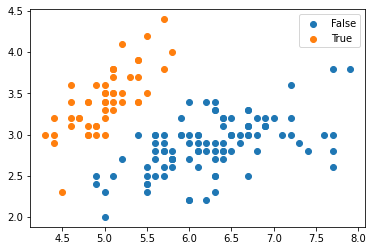

In [8]:
iris_bin_y = iris_y == 0 
plot_data(iris_X,iris_bin_y)

In [9]:
learner = KNeighborsClassifier() 
X, y = iris_X, iris_bin_y 
ax = None

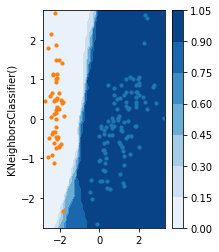

In [10]:
def visualize_probabilistic_classifier_behavior(learner, X, y, ax = None):
  
  if (len(np.unique(y))!= 2):
    raise ValueError("El problema no es de Clasificación Binaria, revise los datos ingresados")
  try:
    
    classifiers = {
            str(learner): learner
        }


    scaled_features = StandardScaler().fit_transform(X)
    pca = PCA(n_components=2)
    X = pca.fit_transform(scaled_features)


    min1, max1 = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1 #1st feature
    min2, max2 = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1 #2nd feature
    x1_scale = np.arange(min1, max1, 0.1)
    x2_scale = np.arange(min2, max2, 0.1)
    x_grid, y_grid = np.meshgrid(x1_scale, x2_scale)

    x_g, y_g = x_grid.flatten(), y_grid.flatten()
    x_g, y_g = x_g.reshape((len(x_g), 1)), y_g.reshape((len(y_g), 1))

    grid = np.hstack((x_g, y_g))

    for index, (name, classifier) in enumerate(classifiers.items()):
      
      classifier.fit(X, y)

      y_pred = classifier.predict(X)


      p_pred_ = classifier.predict_proba(grid)

      p_pred = p_pred_[:, 0]

      pp_grid = p_pred.reshape(x_grid.shape)




      plt.subplot(1, 2, 1)
      plt.ylabel(name)
      surface = plt.contourf(x_grid, y_grid, pp_grid, cmap='Blues')
      plt.colorbar(surface)

      for class_value in range(2):

          row_ix = np.where(y == class_value)

          plt.scatter(X[row_ix, 0], X[row_ix, 1], cmap='Binary', s=10)
      plt.show()
  except Exception as e:
      return {'status': 400,
                      'message': f'{e}'}

visualize_probabilistic_classifier_behavior(KNeighborsClassifier(),iris_X, iris_bin_y , ax= None)

1.2

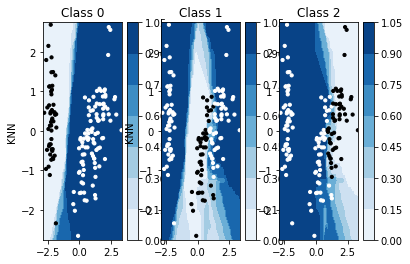

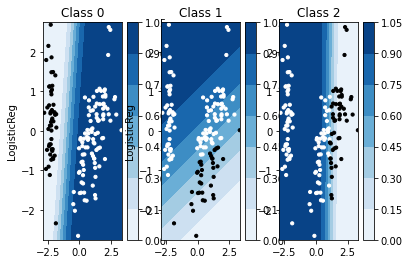

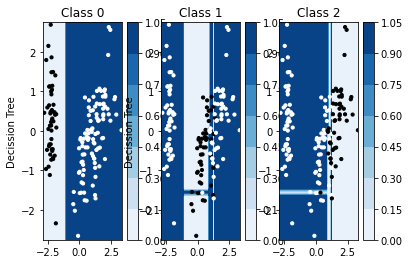

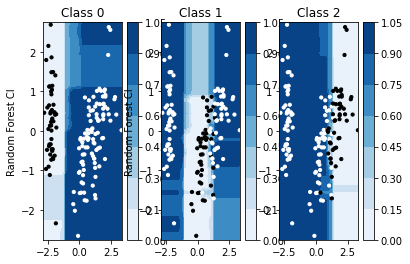

In [11]:

def visual_analysis(learner, X, y, ax = None):

    top = cm.get_cmap('Oranges_r', 128)
    bottom = cm.get_cmap('Blues', 128)

    newcolors = np.vstack((top(np.linspace(0, 1, 128)),
                       bottom(np.linspace(0, 1, 128))))
    newcmp = ListedColormap(newcolors, name='OrangeBlue')



    scaled_features = StandardScaler().fit_transform(X)
    pca = PCA(n_components=2)
    X = pca.fit_transform(scaled_features)


    min1, max1 = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1 #1st feature
    min2, max2 = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1 #2nd feature
    x1_scale = np.arange(min1, max1, 0.1)
    x2_scale = np.arange(min2, max2, 0.1)
    x_grid, y_grid = np.meshgrid(x1_scale, x2_scale)
 
    x_g, y_g = x_grid.flatten(), y_grid.flatten()
    x_g, y_g = x_g.reshape((len(x_g), 1)), y_g.reshape((len(y_g), 1))

    grid = np.hstack((x_g, y_g))
    n_classes = np.unique(y).size
    n_classifiers = len(classifiers)
    if n_classifiers == 1:

      plt.figure(figsize=(12, 6))     
      plt.subplots_adjust(bottom=0.2, top=0.95)


    for index, (name, classifier) in enumerate(classifiers.items()):
      for K in range(n_classes):
        y_bin = y == K 

        classifier.fit(X, y_bin)

        y_pred = classifier.predict(X)

        p_pred_ = classifier.predict_proba(grid)

        p_pred = p_pred_[:, 0]
        

        pp_grid = p_pred.reshape(x_grid.shape)


        plt.ylabel(name)
        plt.subplot(1, n_classes , K+1)

        plt.title("Class %d" % K)
        
        surface = plt.contourf(x_grid, y_grid, pp_grid, cmap="Blues")
        plt.colorbar(surface)
        plt.scatter(X[:, 0], X[:, 1],c = y_pred, cmap="binary" , s=10)

      plt.show()


classifiers = {
    "KNN": KNeighborsClassifier(
    ),
    "LogisticReg": LogisticRegression(
    ), 
    "Decission Tree": DecisionTreeClassifier(
    ),   
    "Random Forest Cl": RandomForestClassifier(
    ),     
}

visual_analysis(classifiers,iris_X, iris_y , ax= None)

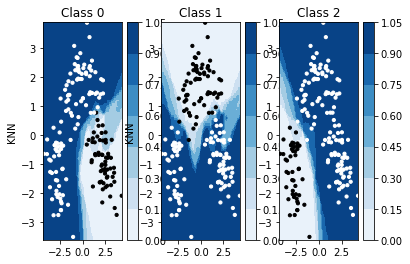

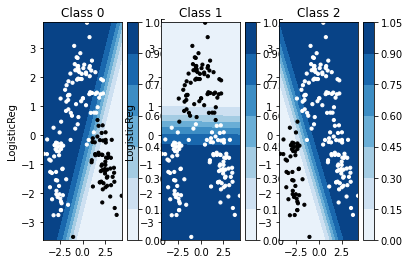

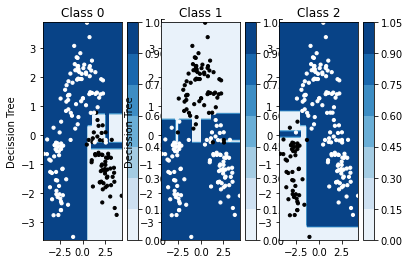

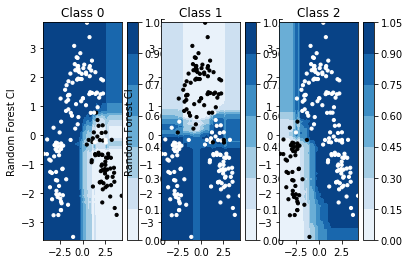

In [12]:
visual_analysis(classifiers,wine_X, wine_y , ax= None)

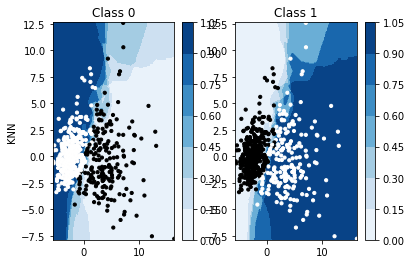

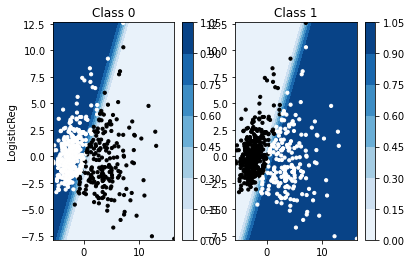

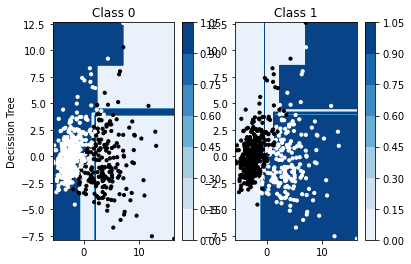

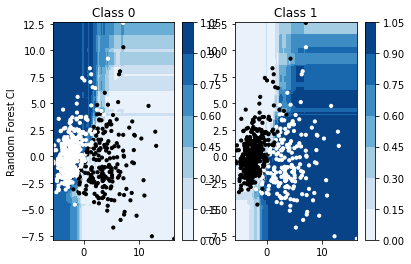

In [13]:
visual_analysis(classifiers,breast_X, breast_y , ax= None)

# **Exercise 2** 

2.1

In [13]:
class GBClassifier(object):
    def fit(self, X, Y):
        n, d = X.shape
        self.g = dict()
        self.p = dict()
        lab = set(Y)
        for c in lab:
            c_x = X[Y == c]
            self.g[c] = {
                'mean': c_x.mean(axis=0),
                'cov': np.cov(c_x.T) + np.eye(d),
            }
            self.p[c] = float(len(Y[Y == c])) / len(Y)


    def predict_proba(self, X):
        n, d = X.shape
        k = len(self.g)
        P = np.zeros((n, k))
        for c, g in iteritems(self.g):
            mean, cov = g['mean'], g['cov']
            P[:,c] = mvn.pdf(X, mean=mean, cov=cov)# + np.log(self.p[c])
        #return np.argmax(P, axis=1)
        return P




a=GBClassifier()
a.fit(iris_X,iris_y)
y_pred=a.predict_proba(iris_X)
y_pred

array([[2.17853491e-02, 2.67729757e-04, 4.32918781e-06],
       [2.01944009e-02, 3.45253118e-04, 5.21236171e-06],
       [2.04501611e-02, 2.19915298e-04, 3.13506152e-06],
       [1.96338868e-02, 3.39979300e-04, 5.56406319e-06],
       [2.16252135e-02, 2.34175302e-04, 3.81768632e-06],
       [1.81912394e-02, 4.34451972e-04, 1.08030380e-05],
       [2.03585387e-02, 2.42200627e-04, 4.06319967e-06],
       [2.19315224e-02, 3.50950735e-04, 6.03366491e-06],
       [1.68724547e-02, 2.55734240e-04, 3.77857431e-06],
       [2.06833199e-02, 3.71717500e-04, 5.76359103e-06],
       [1.99742474e-02, 2.96643756e-04, 5.40869917e-06],
       [2.13373197e-02, 3.91602579e-04, 7.21541720e-06],
       [1.98039458e-02, 2.97554704e-04, 4.20370471e-06],
       [1.55103316e-02, 1.01921820e-04, 1.14494167e-06],
       [1.42905069e-02, 9.86013170e-05, 1.51009862e-06],
       [1.21874901e-02, 1.36333630e-04, 3.14993579e-06],
       [1.83863606e-02, 1.74741120e-04, 3.16960861e-06],
       [2.17788240e-02, 2.92670

2.2

In [159]:
class GBClassifier(object):
    def fit(self, X, Y):
        n, d = X.shape
        self.g = dict()
        self.p = dict()
        lab = set(Y)
        for c in lab:
            c_x = X[Y == c]
            self.g[c] = {
                'mean': c_x.mean(axis=0),
                'cov': np.cov(c_x.T) + np.eye(d),
            }
            self.p[c] = float(len(Y[Y == c])) / len(Y)


    def predict(self, X):
        n, d = X.shape
        k = len(self.g)
        P = np.zeros((n, k))
        for c, g in iteritems(self.g):
            mean, cov = g['mean'], g['cov']
            P[:,c] = mvn.pdf(X, mean=mean, cov=cov) + np.log(self.p[c])
        return np.argmax(P, axis=1)



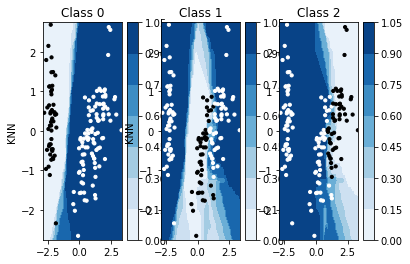

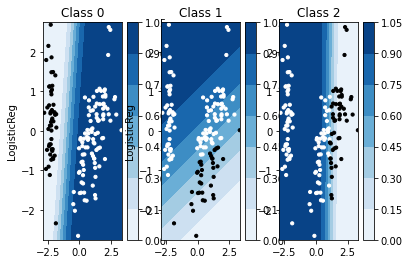

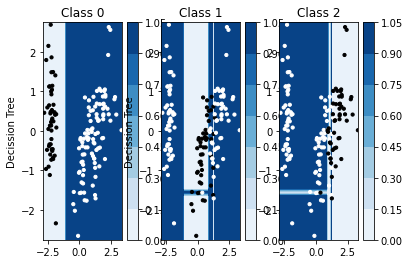

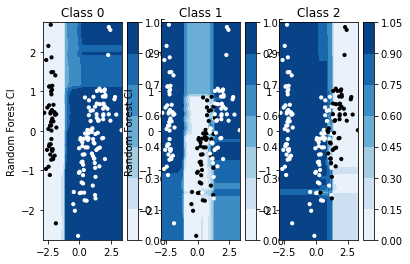

ValueError: ignored

In [160]:
classifiers = {
    "KNN": KNeighborsClassifier(
    ),
    "LogisticReg": LogisticRegression(
    ), 
    "Decission Tree": DecisionTreeClassifier(
    ),   
    "Random Forest Cl": RandomForestClassifier(
    ),   
    "Bayes": GBClassifier(
    ),     
}
visual_analysis(classifiers,iris_X, iris_y , ax= None)

______________- FIN del SCRIPT ________________

class GBClassifier:
    miu = None
    sum = None
    n_classes = None

    def fit (self,X,y):
        self.miu = []
        self.sum = []
        
        self.n_classes = np.unique(y)
        for i in (np.unique(y)):
            Xc = X[y==i]
            n=len(Xc)
            p=len(Xc)/len(X)
            self.miu=Xc.mean().transpose()#,dtype=np.float64
            #print(self.miu)
            #print(self.miu)
            #Z=df1.drop("target",axis=1)-self.miu
            Z=Xc-self.miu
            #sum=np.cov(df1.drop("target",axis=1))
            sum=np.cov(Xc,rowvar=False)

    def predict_proba(self, X):
        for j in np.unique(iris_y):
            #print(miu[i])
            miu=np.array(self.miu.T)
            print(self.miu)
            print(self.sum)
            mnormal = multivariate_normal.pdf(X, self.miu[j], sum[j])
            #p=len(df1)/len(df)
            
            #prob_vect[i] = p*mnormal.pdf(x)
            #sumatory = 0.

    #def predict(self, X):
a=GBClassifier()
a.fit(iris_X,iris_y)
a.predict_proba(iris_X)